import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

memuat data serta visualisasi data & fitur

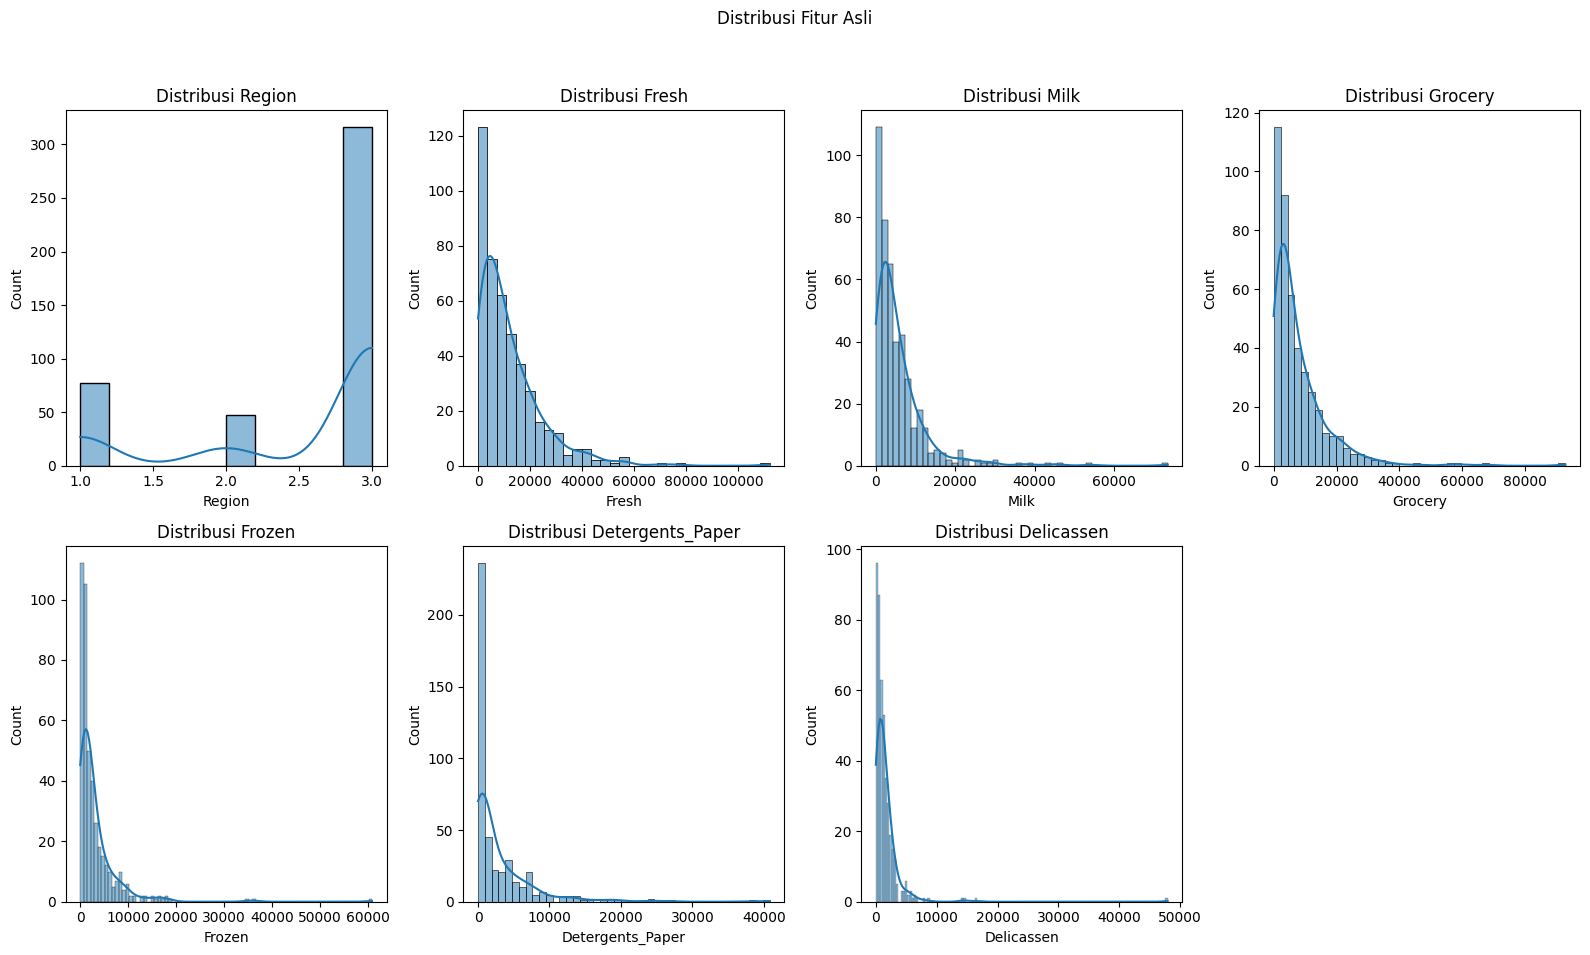

In [ ]:
# Memuat data
file_path = 'rakhasosis.csv'
data = pd.read_csv(file_path)

# Visualisasi distribusi fitur
def plot_feature_distributions(df, columns, title):
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 4, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribusi {col}')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_feature_distributions(data, data.columns.drop('Channel'), 'Distribusi Fitur Asli')

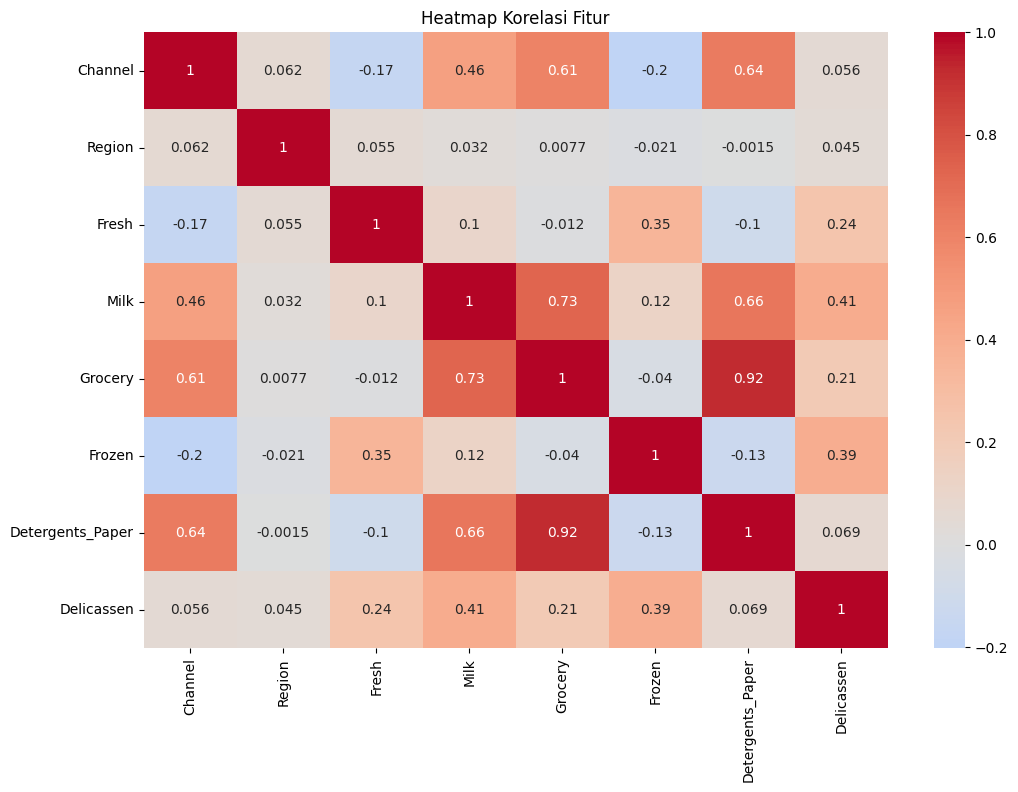

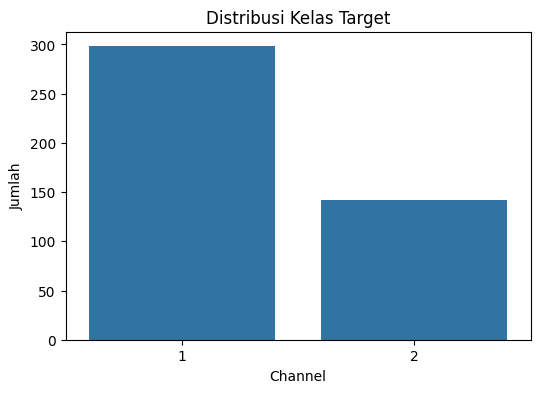

In [ ]:
# Visualisasi korelasi fitur dengan heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Fitur')
plt.show()

# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Channel'])
plt.title('Distribusi Kelas Target')
plt.xlabel('Channel')
plt.ylabel('Jumlah')
plt.show()


normalisasi data

In [ ]:
# Memisahkan fitur dan target
X = data.drop(columns=['Channel'])
y = data['Channel']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Algoritma DT

In [ ]:
# Melatih model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

# Evaluasi model Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

Algoritma KNN

In [ ]:
# Melatih model K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)


# Evaluasi model K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

result

In [ ]:
print("Akurasi Decision Tree:", dt_accuracy)
print("Laporan Klasifikasi Decision Tree:\n", dt_classification_report)
print("Akurasi K-Nearest Neighbors:", knn_accuracy)
print("Laporan Klasifikasi K-Nearest Neighbors:\n", knn_classification_report)

Akurasi Decision Tree: 0.8333333333333334
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           1       0.91      0.85      0.88        94
           2       0.68      0.79      0.73        38

    accuracy                           0.83       132
   macro avg       0.80      0.82      0.81       132
weighted avg       0.84      0.83      0.84       132

Akurasi K-Nearest Neighbors: 0.8863636363636364
Laporan Klasifikasi K-Nearest Neighbors:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92        94
           2       0.78      0.84      0.81        38

    accuracy                           0.89       132
   macro avg       0.86      0.87      0.86       132
weighted avg       0.89      0.89      0.89       132




### Analisis dan Kesimpulan

1. **Akurasi**: Model K-Nearest Neighbors (KNN) memiliki akurasi yang lebih tinggi, yaitu 88.64%, dibandingkan dengan Decision Tree (DT) yang memiliki akurasi 83.33%.
2. **Precision, Recall, dan F1-Score**:
 - Untuk kelas `1`, kedua model memiliki performa yang baik, namun KNN sedikit lebih unggul dalam hal precision.
 - Untuk kelas `2`, KNN lebih unggul dengan precision dan recall yang lebih tinggi dibandingkan DT.

### Kesimpulan
- **Model K-Nearest Neighbors (KNN)** adalah model yang lebih baik untuk dataset ini, dengan akurasi yang lebih tinggi dan metrik performa yang lebih baik untuk kedua kelas.
- **Decision Tree (DT)** juga memiliki performa yang cukup baik, namun tidak sebaik KNN dalam skenario ini.

Untuk meningkatkan performa lebih lanjut, kita bisa mempertimbangkan tuning hyperparameter untuk kedua model, menggunakan cross-validation, atau mencoba algoritma lain.

Kesimpulan dan Implementasi Bisnis
Segmentasi Pelanggan:

DT dan KNN: Kedua model ini membantu mengidentifikasi pola pembelian yang berbeda antara segmen Horeca dan Retail. KNN memiliki performa yang lebih baik dalam memprediksi segmen pelanggan dengan akurasi yang lebih tinggi.
Implementasi: Menggunakan hasil segmentasi untuk menargetkan kampanye pemasaran yang lebih spesifik, seperti diskon khusus atau program loyalitas untuk pelanggan Horeca yang sering membeli produk segar.

DT dan KNN: Membantu memprediksi permintaan produk. KNN memberikan prediksi yang lebih akurat sehingga dapat digunakan untuk mengatur stok produk dengan lebih baik.
Implementasi: Memastikan persediaan produk beku yang cukup untuk pelanggan di segmen Horeca, mengurangi biaya penyimpanan dan risiko kelebihan atau kekurangan stok.

DT dan KNN: Menyediakan informasi tentang kebutuhan pelanggan. KNN yang lebih akurat dapat membantu mengidentifikasi segmen pelanggan yang membeli produk mewah.
Implementasi: Mengembangkan atau memperluas lini produk mewah berdasarkan preferensi pelanggan yang diidentifikasi oleh model KNN.

DT dan KNN: Membantu menganalisis pola pembelian untuk menetapkan harga yang lebih kompetitif. KNN yang lebih akurat dapat digunakan untuk strategi harga dinamis berdasarkan permintaan.
Implementasi: Memberikan diskon volume untuk pelanggan yang membeli dalam jumlah besar dan menerapkan harga dinamis untuk mengoptimalkan penjualan dan keuntungan.

DT dan KNN: Menyediakan layanan yang lebih personal dan relevan. KNN yang lebih akurat dapat memberikan rekomendasi produk yang lebih baik berdasarkan riwayat pembelian.
Implementasi: Meningkatkan kepuasan pelanggan dengan menyediakan produk yang tepat sesuai kebutuhan mereka, serta menawarkan layanan yang lebih personal.
Dengan menerapkan strategi ini, perusahaan dapat meningkatkan efisiensi operasional, kepuasan pelanggan, dan keuntungan bisnis secara keseluruhan.